In [201]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model

In [202]:
vale = yf.download('BTC-USD', period='10y', interval= '1wk')
vale

[*********************100%***********************]  1 of 1 completed


c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:681: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:517: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:518: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Li

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-15,465.864014,468.174011,384.532013,398.821014,398.821014,156903400
2014-09-22,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2014-09-29,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
2014-10-06,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
2014-10-13,377.920990,411.697998,368.897003,389.545990,389.545990,156902070
...,...,...,...,...,...,...
2024-07-22,68152.976562,69398.507812,63473.472656,68255.867188,68255.867188,227265184992
2024-07-29,68259.054688,69987.539062,57210.804688,58116.976562,58116.976562,251002338760
2024-08-05,58110.296875,62673.765625,49121.238281,58719.484375,58719.484375,317158734647


In [203]:
data_cota = vale['Adj Close']

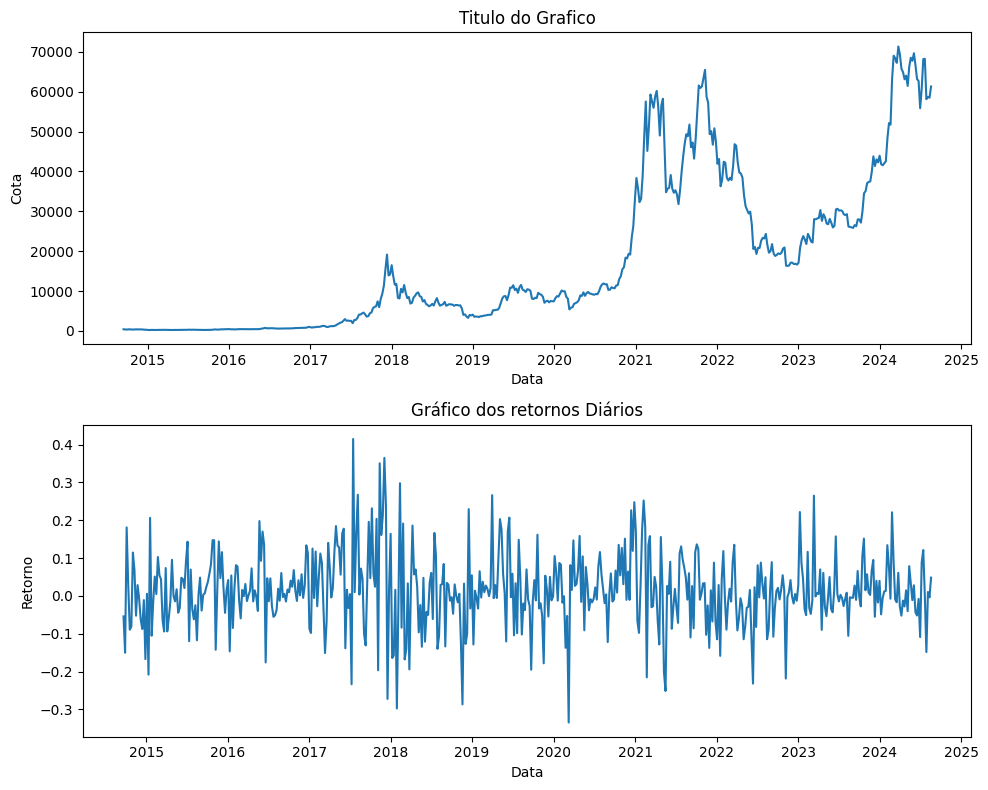

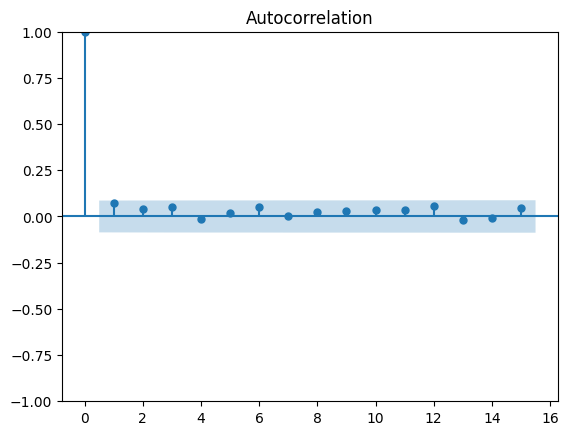

Iteration:      5,   Func. Count:     36,   Neg. LLF: -466.96434019129845
Iteration:     10,   Func. Count:     63,   Neg. LLF: -495.7656105138899
Optimization terminated successfully    (Exit mode 0)
            Current function value: -495.76561051375717
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                495.766
Distribution:                  Normal   AIC:                          -983.531
Method:            Maximum Likelihood   BIC:                          -966.531
                                        No. Observations:                  518
Date:                Wed, Aug 21 2024   Df Residuals:                      517
Time:     

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009617. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




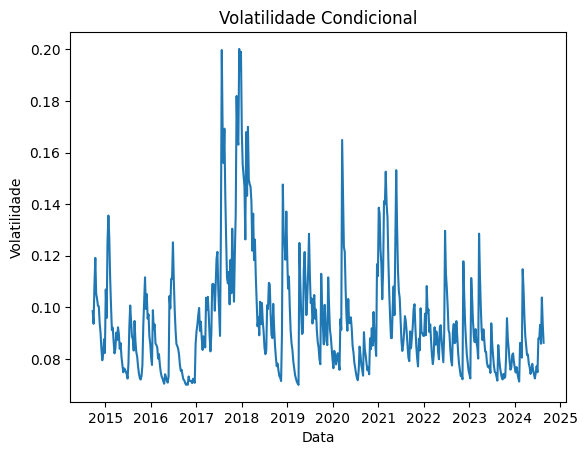

In [204]:
# # Ler o arquivo Excel e a planilha específica
# pu = pd.read_excel("Carteiras Simuladas.xlsx",
#                    sheet_name="Pu",)

# # Converter a coluna 'Data' para datetime
# pu['Data'] = pd.to_datetime(pu['Data'])

# # Definir a coluna 'Data' como índice
# pu.set_index('Data', inplace=True)

# # Selecionar a coluna x (Python usa indexação baseada em 0, então a coluna #5 é a sexta coluna)
# data_cota = pu.iloc[:, 6] 

# Plotar o gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(data_cota)
ax[0].set_title("Titulo do Grafico")
ax[0].set_xlabel("Data")
ax[0].set_ylabel("Cota")

# Calcular os retornos discretos
retorno = data_cota.pct_change().dropna()

ax[1].plot(retorno)
ax[1].set_title("Gráfico dos retornos Diários")
ax[1].set_xlabel("Data")
ax[1].set_ylabel("Retorno")

plt.tight_layout()
plt.show()

# ACF Plot
sm.graphics.tsa.plot_acf(retorno, lags=15)
plt.show()

# GARCH(1,1) Model
am = arch_model(retorno, vol='Garch', p=1, q=1,dist='gaussian')
res = am.fit(update_freq=5)
print(res.summary())

# Plot da volatilidade
fig, ax = plt.subplots()
ax.plot(res.conditional_volatility)
ax.set_title("Volatilidade Condicional")
ax.set_xlabel("Data")
ax.set_ylabel("Volatilidade")
plt.show()

In [205]:
# Cria a carteira simulada
forecast_horizon = 25
forecasts = res.forecast(horizon=forecast_horizon, params=res.params, method='simulation')

# Estima GARCH para a carteira simulada
am = arch_model(retorno, vol='Garch', p=1, q=1)
rolling_window = 21
forecasts = am.forecast(start=rolling_window, horizon=forecast_horizon, params=res.params, method='simulation')

In [206]:
risco_estimado  = (np.sqrt(forecasts.variance.iloc[-1])*np.sqrt(52))*100

risco_estimado  

h.01    59.233017
h.02    61.032469
h.03    62.298401
h.04    64.073392
h.05    64.645473
h.06    65.665376
h.07    66.422126
h.08    66.843640
h.09    67.447792
h.10    67.974473
h.11    68.096140
h.12    67.800862
h.13    68.293363
h.14    68.491400
h.15    68.574619
h.16    68.790314
h.17    69.129930
h.18    69.077043
h.19    69.041762
h.20    69.434292
h.21    69.608097
h.22    69.843592
h.23    69.394124
h.24    69.568158
h.25    69.881160
Name: 2024-08-19 00:00:00, dtype: float64

In [207]:
import plotly.express as px
vol_prev = (np.sqrt(forecasts.variance.iloc[-1])*np.sqrt(52))*100

vol_prev = pd.DataFrame(vol_prev)

vol_prev.reset_index(inplace=True)

vol_prev.columns = ['Id' , 'Vol']

vol_prev

fig = px.line(vol_prev, x = vol_prev.index, y=vol_prev['Vol'])

# Edit the layout
fig.update_layout(title='Previsão de Volatilide',
                   xaxis_title='Qtde de Dias Futuros',
                   yaxis_title='Volatilidade Prevista em % ao ano')

fig.show()

In [208]:
vale

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-15,465.864014,468.174011,384.532013,398.821014,398.821014,156903400
2014-09-22,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2014-09-29,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
2014-10-06,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
2014-10-13,377.920990,411.697998,368.897003,389.545990,389.545990,156902070
...,...,...,...,...,...,...
2024-07-22,68152.976562,69398.507812,63473.472656,68255.867188,68255.867188,227265184992
2024-07-29,68259.054688,69987.539062,57210.804688,58116.976562,58116.976562,251002338760
2024-08-05,58110.296875,62673.765625,49121.238281,58719.484375,58719.484375,317158734647


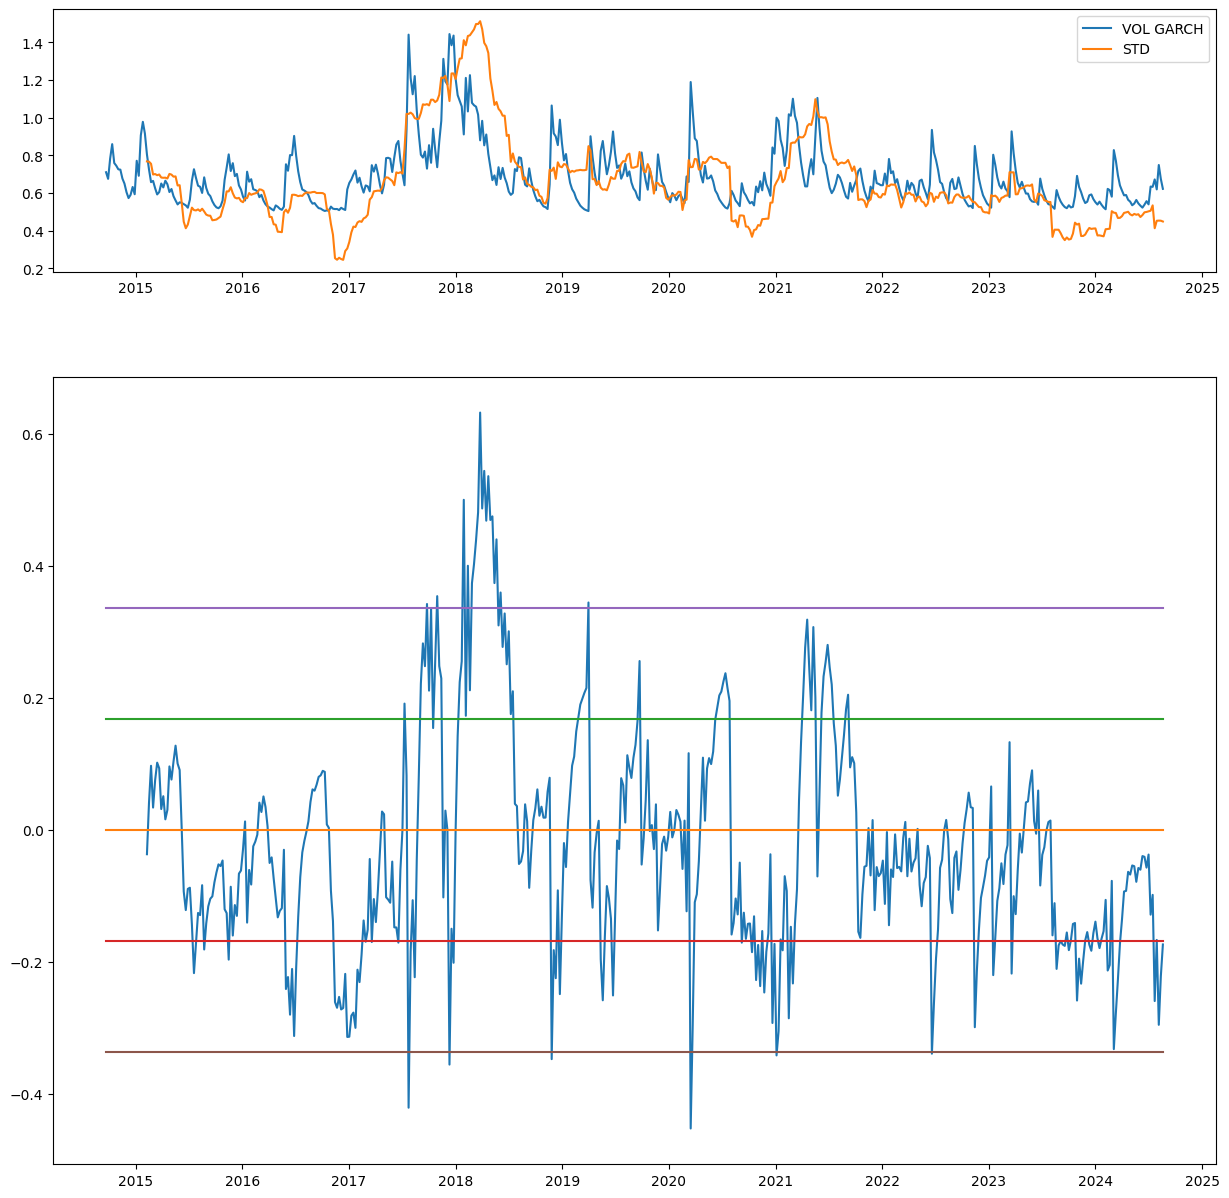

In [216]:
import numpy as np
vol = pd.DataFrame(res.conditional_volatility*np.sqrt(52))

vol.columns = ['VOL GARCH']
vol['STD'] = vale['Adj Close'].pct_change().rolling(21).std()*np.sqrt(52)
vol['SPREAD'] = vol['STD'] - vol['VOL GARCH']
vol ['BASE'] = 0
vol['BASE +1 STD'] = vol['SPREAD'].std()
vol['BASE -1 STD'] = -vol['SPREAD'].std()
vol['BASE +2 STD'] = 2*vol['SPREAD'].std()
vol['BASE -2 STD'] = -2*vol['SPREAD'].std()



# Plotar o gráfico
fig, ax = plt.subplots(2, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [1, 3]})
ax[0].plot(vol[['VOL GARCH', 'STD']])
ax[0].legend(vol[['VOL GARCH', 'STD']].columns)
ax[1].plot(vol[['SPREAD','BASE','BASE +1 STD','BASE -1 STD','BASE +2 STD','BASE -2 STD']])
# plt.tight_layout()
plt.show()

In [210]:
vol.loc[vol['SPREAD'] == vol['SPREAD'].min() ]

,VOL GARCH,STD,SPREAD,BASE,BASE +1 STD,BASE -1 STD,BASE +2 STD,BASE -2 STD
Date,,,,,,,,
2024-03-04,0.827721,0.450377,-0.377344,0,0.185377,-0.185377,0.370755,-0.370755
